# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту *ml-teachers* ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #3: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн: 10.11.2017 00:00 OMSK**

#### Полезная литература

- https://matplotlib.org/gallery/index.html
- http://seaborn.pydata.org/examples/index.html

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$, количество точек должно быть 1000.

<ipython-input-20-1942f53fd841>:4: RuntimeWarning: divide by zero encountered in log
  y2 = np.log(xlog)
<ipython-input-20-1942f53fd841>:5: RuntimeWarning: divide by zero encountered in log
  y3 = np.sin(3*x)/x*np.log(xlog)


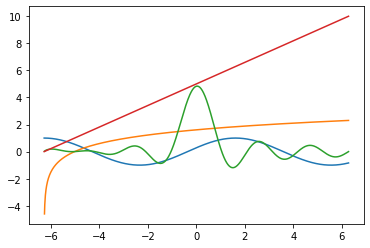

In [20]:
x = np.arange(-2*np.pi,2*np.pi,0.012578)
xlog = np.linspace(0, 10, 1000)
y = np.cos(xlog)
y2 = np.log(xlog)
y3 = np.sin(3*x)/x*np.log(xlog)
y4 = xlog
plt.plot(x,y)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.show()


2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

Text(0.5, 1.0, 'scatter')

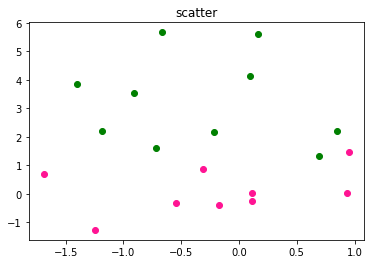

In [44]:
x = np.random.randn(3, 3)
y = np.random.randn(3, 3)
x2 = np.random.randn(10)
y2 = np.random.gamma(4, size = 10)  

fig, axes = plt.subplots(1, 1)
axes.scatter(x,y, c = 'deeppink')
axes.scatter(x2,y2, c = 'g')
axes.set_title("scatter")


# Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [4]:
df = pd.read_csv('../2017-fall/data/bikes_rent.csv.gz', compression='gzip')

df.head(80)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,3,0,4,1,1,17.015000,20.51665,60.2917,14.041793,6.277064,2744
76,1,0,3,0,5,1,1,22.140000,26.35045,52.5217,15.478139,6.919150,3239
77,1,0,3,0,6,0,1,19.372500,23.32625,37.9167,24.667189,11.026906,3117
78,1,0,3,0,0,0,1,13.632500,16.28750,47.3750,13.917307,6.221416,2471


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

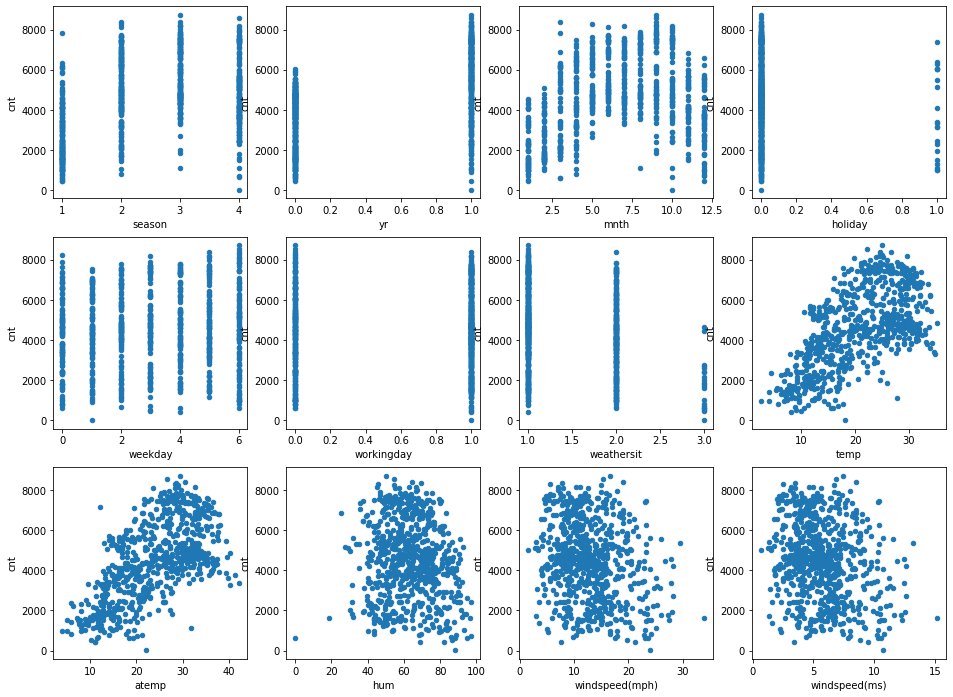

In [19]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ: 

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: temp, atemp

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Меньше всего: holiday weekday workingday hum. Больше всего с temp, atemp, yr, season

<AxesSubplot:>

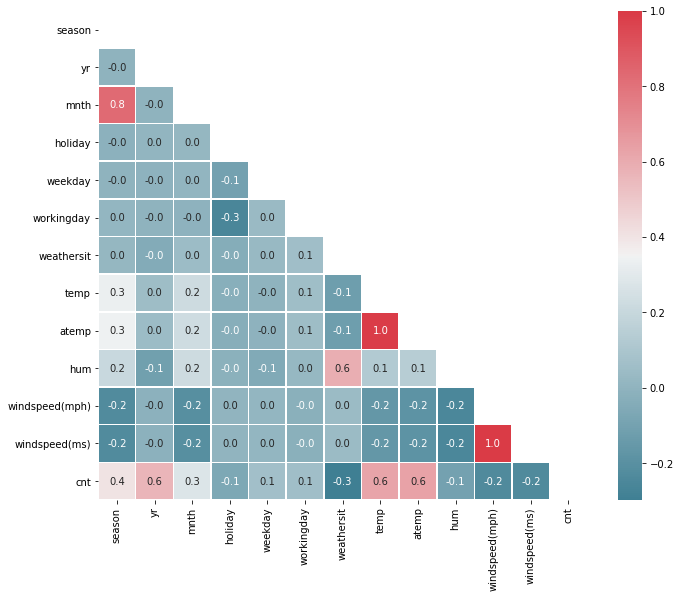

In [27]:
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f")

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Потому, что во втором году относительно первогго кол-во прокатов заметно увеличилось 

<AxesSubplot:>

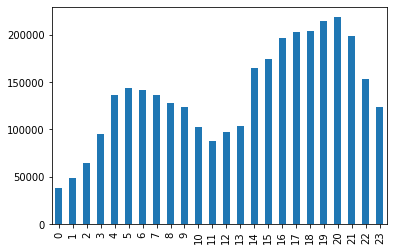

In [52]:
sum=pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
sum[0] = df[(df['mnth'] == 1) & (df['yr'] == 0)]['cnt'].sum()
sum[1] = df[(df['mnth'] == 2) & (df['yr'] == 0)]['cnt'].sum()
sum[2] = df[(df['mnth'] == 3) & (df['yr'] == 0)]['cnt'].sum()
sum[3] = df[(df['mnth'] == 4) & (df['yr'] == 0)]['cnt'].sum()
sum[4] = df[(df['mnth'] == 5) & (df['yr'] == 0)]['cnt'].sum()
sum[5] = df[(df['mnth'] == 6) & (df['yr'] == 0)]['cnt'].sum()
sum[6] = df[(df['mnth'] == 7) & (df['yr'] == 0)]['cnt'].sum()
sum[7] = df[(df['mnth'] == 8) & (df['yr'] == 0)]['cnt'].sum()
sum[8] = df[(df['mnth'] == 9) & (df['yr'] == 0)]['cnt'].sum()
sum[9] = df[(df['mnth'] == 10) & (df['yr'] == 0)]['cnt'].sum()
sum[10] = df[(df['mnth'] == 11) & (df['yr'] == 0)]['cnt'].sum()
sum[11] = df[(df['mnth'] == 12) & (df['yr'] == 0)]['cnt'].sum()
sum[12] = df[(df['mnth'] == 1) & (df['yr'] == 1)]['cnt'].sum()
sum[13] = df[(df['mnth'] == 2) & (df['yr'] == 1)]['cnt'].sum()
sum[14] = df[(df['mnth'] == 3) & (df['yr'] == 1)]['cnt'].sum()
sum[15] = df[(df['mnth'] == 4) & (df['yr'] == 1)]['cnt'].sum()
sum[16] = df[(df['mnth'] == 5) & (df['yr'] == 1)]['cnt'].sum()
sum[17] = df[(df['mnth'] == 6) & (df['yr'] == 1)]['cnt'].sum()
sum[18] = df[(df['mnth'] == 7) & (df['yr'] == 1)]['cnt'].sum()
sum[19] = df[(df['mnth'] == 8) & (df['yr'] == 1)]['cnt'].sum()
sum[20] = df[(df['mnth'] == 9) & (df['yr'] == 1)]['cnt'].sum()
sum[21] = df[(df['mnth'] == 10) & (df['yr'] == 1)]['cnt'].sum()
sum[22] = df[(df['mnth'] == 11) & (df['yr'] == 1)]['cnt'].sum()
sum[23] = df[(df['mnth'] == 12) & (df['yr'] == 1)]['cnt'].sum()
sum.plot(kind='bar')


## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Погода была в основном хорошая
    
Ответ: Равномерное

<AxesSubplot:xlabel='count', ylabel='weekday'>

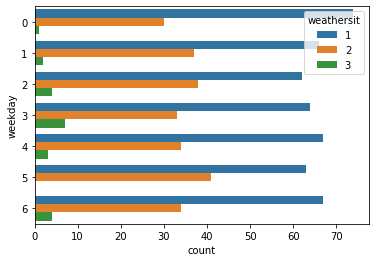

In [54]:
sns.countplot(y='weekday', data=df, hue='weathersit')

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weekday', ylabel='Density'>

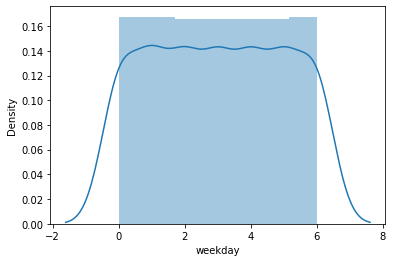

In [56]:
sns.distplot(df['weekday'].dropna())

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: ~4300

Ответ: нормальное распределение 

c:\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

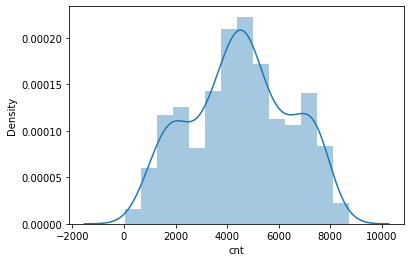

In [55]:
sns.distplot(df['cnt'].dropna())

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Температруа в 30 градусов единоразово ощущалась как 13? Погрешность? В этот день небыло ветра?

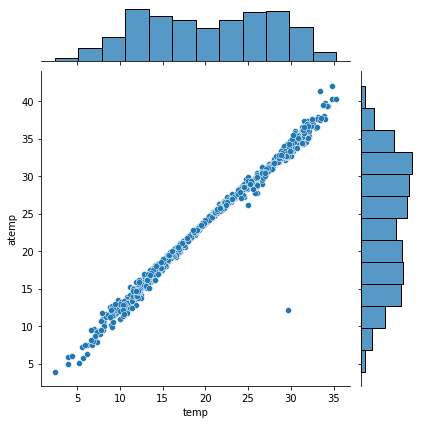

In [64]:
sns.jointplot(data=df,
              x='temp',
              y='atemp');

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: ???

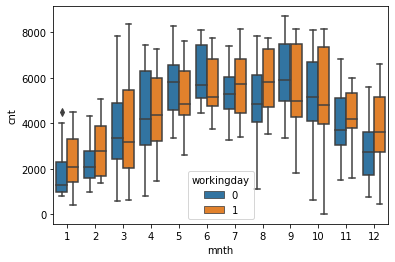

In [5]:
sns.boxplot(x='mnth', y='cnt', hue='workingday', data=df)
mean_weather=pd.Series([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

mean_weather[0] = df[(df['mnth'] == 1) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 2) & (df['workingday'] == 1)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 3) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 4) & (df['workingday'] == 1)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 5) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 6) & (df['workingday'] == 1)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 7) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 8) & (df['workingday'] == 1)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 9) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 10) & (df['workingday'] == 1)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 11) & (df['workingday'] == 0)]['cnt'].sum()
mean_weather[0] = df[(df['mnth'] == 12) & (df['workingday'] == 1)]['cnt'].sum()

## 8*. Со звёздочкой (5 баллов)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: Вычислим разницу между реальной и погодой которая ощущается, добавим ее столбцом в фрейм данных и увидим, что скорось ветра не влияет на разницу между реальной и ощутимой температурой. 

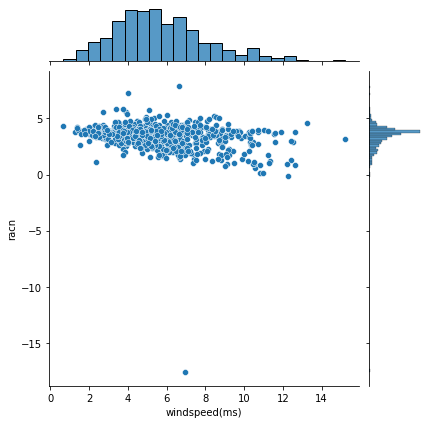

In [23]:
#вычислим разницу между реальной и погодой которая ощущается
racn = df['atemp'] - df['temp']
#добавим ее столбцом в фрейм
df[['racn']] = racn
sns.jointplot(data=df,
              x='windspeed(ms)',
              y='racn');